In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

<div class="alert-warning">
    
## Instructions  
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
  
- Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 

### Group work instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   
### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  


### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Note: Unlike previous assignments, this one is open-ended and project-style. Treat it as an opportunity to explore, experiment, and learn._

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV, 
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

<!-- END QUESTION -->

## Introduction

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (10-14 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


<div class="alert alert-info">
    
**Your tasks:**

1. Review the available datasets and choose the one you find most interesting. It may help to read through the dataset documentation on Kaggle before deciding.
2. Once you've selected a dataset, take time to understand the problem it represents and the meaning of each feature. Use the Kaggle documentation to guide you.
3. Download the dataset and load it into a pandas DataFrame.
4. Write a few sentences summarizing your initial thoughts about the problem and the dataset.
   
</div>

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

In [3]:
airbnb_data = pd.read_csv("data/airbnb_data.csv")
pd.DataFrame(airbnb_data.describe())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.

</div>

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
X = airbnb_data.drop(columns= ["reviews_per_month"])
y = airbnb_data["reviews_per_month"]

X = X.dropna()
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA
<hr>
rubric={points:10}

<div class="alert alert-info">

**Your tasks:**

1. **Perform exploratory data analysis (EDA)**: Conduct an initial exploration of the training set to better understand its characteristics.

2. **Summarize and visualize the data**: Include at least **two summary statistics** and **two visualizations** that you find informative. For each, write **one sentence** explaining what insight it provides.

3. **Record your observations**: Summarize your **initial observations** about the dataset based on your EDA.

4. **Select evaluation metrics**: Choose one or more **appropriate metrics** for assessing model performance and briefly justify your choice.

</div>

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

I will explore the training data to understand its characteristics, including summary statistics and visualizations that reveal the distribution of features and target variable, identify outliers, and assess data quality issues.

In [5]:
train_summary = X_train.describe()
train_summary

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,2.717400e+04,2.717400e+04,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000
mean,1.799330e+07,6.353404e+07,40.728312,-73.951366,142.572054,5.978950,29.492714,5.148672,114.698867
std,1.072544e+07,7.550212e+07,0.055030,0.046505,197.372055,19.249904,48.617350,26.179356,129.534040
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,1.000000,0.000000
25%,8.559726e+06,6.878163e+06,40.688640,-73.982420,69.000000,1.000000,3.000000,1.000000,0.000000
50%,1.872288e+07,2.797422e+07,40.721750,-73.955020,102.000000,2.000000,9.000000,1.000000,55.000000
75%,2.751905e+07,9.942811e+07,40.763100,-73.935640,170.000000,4.000000,34.000000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.719280,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [6]:
print(train_summary.loc["max"])
    

id                                3.645581e+07
host_id                           2.738417e+08
latitude                          4.091306e+01
longitude                        -7.371928e+01
price                             1.000000e+04
minimum_nights                    1.250000e+03
number_of_reviews                 6.290000e+02
calculated_host_listings_count    3.270000e+02
availability_365                  3.650000e+02
Name: max, dtype: float64


In [7]:
print("dataset shape: " + str(X_train.shape))

dataset shape: (27174, 15)


/var/folders/gk/bhfzvwy533b6k4g4ytf8ppq40000gn/T/ipykernel_75293/674978823.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


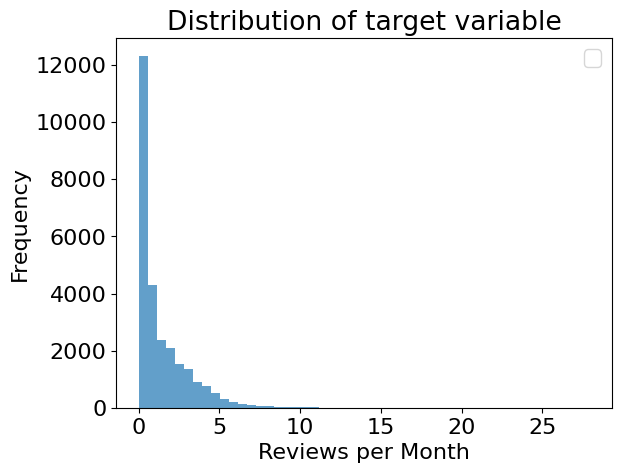

In [8]:
plt.hist(y_train, bins=50, alpha=0.7)
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency')
plt.title('Distribution of target variable')
plt.legend()
plt.show()

In [9]:
# neighbourhood group distribution
plt.bar(X_train['neighbourhood_group'].value_counts().index, neighbourhood_counts.values, alpha=0.7)
plt.xlabel('Neighbourhood group')
plt.ylabel('Number of listings')
plt.title('Distribution of listings by neighbourhood')
plt.show()

NameError: name 'neighbourhood_counts' is not defined

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering
<hr>
rubric={points:1}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature engineering**: Create new features that are relevant to the problem and use this updated feature set in the following exercises. You may need to iterate between **feature engineering** and **preprocessing** to refine your features and improve model performance.
   
</div>

In [ ]:
X_train_eng = X_train.copy()
X_test_eng = X_test.copy()

# log transformation 
X_train_eng['log_price'] = np.log1p(X_train_eng['price'])  
X_test_eng['log_price'] = np.log1p(X_test_eng['price'])

# availability features
# I chose 200days/yr to be the threshold between not high / high availability 
X_train_eng['high_availability'] = X_train_eng['availability_365'] > 200
X_test_eng['high_availability'] = X_test_eng['availability_365'] > 200

# availability percentage
X_train_eng['availability_percent'] = X_train_eng['availability_365'] / 365
X_test_eng['availability_percent'] = X_test_eng['availability_365'] / 365

# log transformation of host listings count
X_train_eng['log_host_listings'] = np.log1p(X_train_eng['calculated_host_listings_count'])
X_test_eng['log_host_listings'] = np.log1p(X_test_eng['calculated_host_listings_count'])

print("New features created:")
print(f"Training set shape: {X_train_eng.shape}")
print(f"Test set shape: {X_test_eng.shape}")

X_train = X_train_eng
X_test = X_test_eng

New features created:
Training set shape: (27174, 20)
Test set shape: (11647, 20)


<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Identify feature types**: Determine the different types of features in your dataset (e.g., numerical, categorical, ordinal, text) and specify the transformations you would apply to each type.

2. **Define a column transformer (if needed)**: Implement a `ColumnTransformer` to apply the appropriate preprocessing steps to each feature type.
 
</div>

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

x_train_columns, y_train_column = [X.columns.tolist(), y.name]

print("X_train columns:", x_train_columns)
print("y_train column:", y_train_column)

X_train columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'calculated_host_listings_count', 'availability_365']
y_train column: reviews_per_month


In [ ]:
numerical_feats = ["latitude","longitude","price","minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365"]
categorical_feats = ["neighbourhood_group","neighbourhood","room_type"]
drop_feats = ["host_id","host_name","last_review", "id","name"]

In [ ]:
ohe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

scaler = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

transformer = make_column_transformer(
    (scaler, numerical_feats),
    (ohe, categorical_feats),
    ("drop", drop_feats)
)

transformer.fit(X_train)
transformed_df = pd.DataFrame(transformer.transform(X_train))

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Establish a baseline**: Use one of `scikit-learn`’s baseline models (e.g., `DummyClassifier` or `DummyRegressor`, depending on your task) and report the results. This will serve as a reference point for evaluating the performance of your more advanced models.

</div>

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [ ]:
dr = DummyRegressor()
dr.fit(X_train, y_train)

baseline_test_score = dr.score(X_test, y_test)
print(baseline_test_score)

-4.121067753715124e-07


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models 
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Train a linear model**: Use a linear model as your first real attempt at solving the problem.

2. **Tune hyperparameters**: Perform hyperparameter tuning to explore different values of the model's complexity parameter. 

3. **Evaluate with cross-validation**: Report the cross-validation scores along with their standard deviation.

4. **Summarize findings**: Summarize your results, highlighting key observations from your experiments.

</div>

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

I will use LinearRegression to predict `reviews_per_month`. LinearRegression fits a linear model using ordinary least squares to minimize the residual sum of squares. I'll evaluate the model using cross-validation with R² as the evaluation metric since this is a regression problem. Note that LinearRegression has no hyperparameters to tune.

In [ ]:
from sklearn.linear_model import LinearRegression
lr_pipe = make_pipeline(transformer, LinearRegression())

cv_results = cross_validate(lr_pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(cv_results)

print("Mean train score: " + str(cv_results['train_score'].mean()))
print("Mean test score: " + str(cv_results['test_score'].mean()))

Mean train score: 0.3670370440059031
Mean test score: 0.3509563146083942


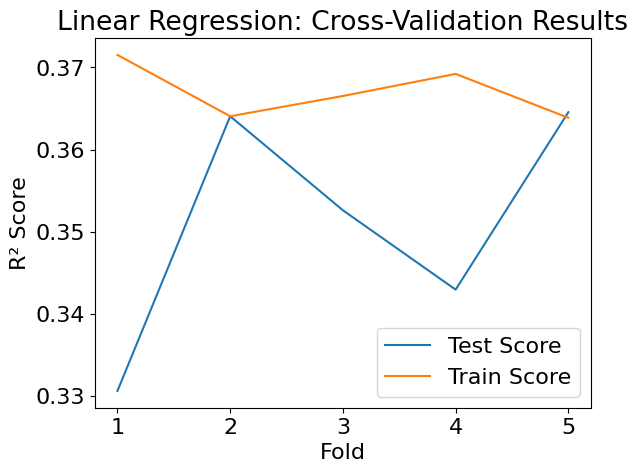

In [ ]:
plt.plot(range(1, 6), cv_results['test_score'], label='Test Score')
plt.plot(range(1, 6), cv_results['train_score'], label='Train Score')
plt.xlabel('Fold')
plt.ylabel('Test score')
plt.title('Linear Regression: Cross-Validation Results')
plt.legend()
plt.show()

Summary:
Although greater than the baseline model's test score, both test and train score remain at a reasonably low accuracy, suggesting need for further improvements or a differnet model.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models
<hr>
rubric={points:12}

<div class="alert alert-info">
    
**Your tasks:**

1. **Experiment with additional models**: Train at least **three models** other than a linear model. Ensure that **at least one** of these models is a **tree-based ensemble model** (e.g., Random Forest, Gradient Boosting, or XGBoost).

2. **Compare and interpret results**: Summarize your findings in terms of **overfitting/underfitting** behavior and **fit/score times** for each model. Reflect on your results. Were you able to **outperform the linear model**?

</div>

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

3 models I chose:
Random Forest Regressor
Gradient Boosting Regressor  
K-Nearest Neighbors (KNN) Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import time

model_results = {}

def evaluate_model(model_name, model, X_train, y_train):
    pipe = make_pipeline(transformer, model)
    start_time = time.time()
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True, scoring='r2')
    elapsed_time = time.time() - start_time
    
    return {
        'mean_test_score': cv_results['test_score'].mean(),
        'mean_train_score': cv_results['train_score'].mean(),
        'time': elapsed_time,
        'cv_results': cv_results
    }

print("Random Forest:")
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=123, n_jobs=-1)
model_results['Random Forest'] = evaluate_model('Random Forest', rf_model, X_train, y_train)

print("Mean CV Test Score: " + str(model_results['Random Forest']['mean_test_score']))
print("Mean CV Train Score: " + str(model_results['Random Forest']['mean_train_score']))
print("Time: " + str(model_results['Random Forest']['time']) + " seconds")

Random Forest:
Mean CV Test Score: 0.5316791899347478
Mean CV Train Score: 0.6470241537815721
Time: 14.252602100372314 seconds


In [ ]:
print("Gradient Boosting:")
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=5, learning_rate=0.1, random_state=123)
model_results['Gradient Boosting'] = evaluate_model('Gradient Boosting', gb_model, X_train, y_train)

print("Mean CV Test Score: " + str(model_results['Gradient Boosting']['mean_test_score']))
print("Mean CV Train Score: " + str(model_results['Gradient Boosting']['mean_train_score']))
print("Time: " + str(model_results['Gradient Boosting']['time']) + " seconds")

Gradient Boosting:
Mean CV Test Score: 0.536917760852296
Mean CV Train Score: 0.5938992596637995
Time: 11.729881763458252 seconds


In [ ]:
print("KNN:")
knn_model = KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
model_results['KNN'] = evaluate_model('KNN', knn_model, X_train, y_train)

print("Mean CV Test Score: " + str(model_results['KNN']['mean_test_score']))
print("Mean CV Train Score: " + str(model_results['KNN']['mean_train_score']))
print("Time: " + str(model_results['KNN']['time']) + " seconds")

KNN:


Mean CV Test Score: 0.41531136248626177
Mean CV Train Score: 0.5232245959524474
Time: 104.77898502349854 seconds


In [ ]:
lr_mean_test = cv_results['test_score'].mean()
lr_mean_train = cv_results['train_score'].mean()

model_results['Linear Regression'] = {
    'mean_test_score': lr_mean_test,
    'mean_train_score': lr_mean_train,
    'time': 0  
}

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'KNN'],
    'mean test score': [model_results['Linear Regression']['mean_test_score'],
                      model_results['Random Forest']['mean_test_score'],
                      model_results['Gradient Boosting']['mean_test_score'],
                      model_results['KNN']['mean_test_score']],
    'mean train score': [model_results['Linear Regression']['mean_train_score'],
                       model_results['Random Forest']['mean_train_score'],
                       model_results['Gradient Boosting']['mean_train_score'],
                       model_results['KNN']['mean_train_score']],
    'time in sec' : [model_results['Linear Regression']['time'],
                  model_results['Random Forest']['time'],
                  model_results['Gradient Boosting']['time'],
                  model_results['KNN']['time']]
})

print(comparison_df.to_string(index=False))


            Model  mean test score  mean train score  time in sec
Linear Regression         0.350956          0.367037     0.000000
    Random Forest         0.531679          0.647024    14.252602
Gradient Boosting         0.536918          0.593899    11.729882
              KNN         0.415311          0.523225   104.778985


Best model: Gradient Boosting with test score 0.5369
The GB model was able to outperform the dummy regressor model, meaning that it is valid. It also took the least amount of time, indicating how it is more efficient than other models.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection 
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature selection**: Attempt to select relevant features using methods such as `RFECV` or forward selection.

2. **Evaluate the impact** Compare the model performance before and after feature selection. Do the results improve with feature selection?

3. **Summarize findings** Summarize your observations and decide whether to **keep feature selection** in your pipeline.  If it improves results, retain it for the next exercises; otherwise, you may choose to omit it.
</div>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingRegressor

X_train_transformed = transformer.transform(X_train)

base_estimator = GradientBoostingRegressor(n_estimators=50, max_depth=5, random_state=123)

rfecv = RFECV(estimator=base_estimator,step=5,cv=2,min_features_to_select=1,n_jobs=-1)
rfecv.fit(X_train_transformed, y_train)

print("Optimal number of features: " + str(rfecv.n_features_))

Optimal number of features: 45


In [ ]:
print("before feature selection:")
before_results = model_results['Gradient Boosting']
print("test and train scores: " + str(before_results['mean_test_score']) + str(before_results['mean_train_score']))

print("after feature selection:")
selected_features = rfecv.support_
X_train_selected = X_train_transformed[:, selected_features]

from sklearn.model_selection import cross_validate
after_results_full = cross_validate(
    GradientBoostingRegressor(n_estimators=50, max_depth=5, learning_rate=0.1, random_state=123),
    X_train_selected,
    y_train,
    cv=5,
    return_train_score=True,
)

print("test and train scores: " + str(after_results_full['test_score'].mean()) + str(after_results_full['train_score'].mean()))


before feature selection:
test and train scores: 0.5369177608522960.5938992596637995
after feature selection:
test and train scores: 0.5385820512128390.5945157918981174


Summary:

Given that ensemble models like Gradient Boosting have built-in feature importance mechanisms and can handle many features effectively, feature selection may not provide significant benefits.

Given the moderate performance improvements, it will be a better choice not keep feature selection in the pipeline. The Gradient boosting model already performs well with all features.
For this regression problem with a limited number of features, feature selection does not provide meaningful benefit. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Optimize hyperparameters**: Attempt to optimize hyperparameters for the models you have tried so far. In at least **one case**, tune **multiple hyperparameters** for a single model.

2. **Use suitable optimization methods**: You may use any of the following approaches for hyperparameter optimization:
   - [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
   - [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
   - [Bayesian optimization with scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

3. **Summarize your results**: Report and compare the optimized results across models. Discuss whether hyperparameter optimization led to performance improvements.

</div>

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# gradient boosting
param_grid_gb = {
    'gradientboostingregressor__n_estimators': [50, 100, 150, 200],
    'gradientboostingregressor__max_depth': [3, 5, 7, 9],
    'gradientboostingregressor__learning_rate': [0.01, 0.05, 0.1, 0.15],
    'gradientboostingregressor__subsample': [0.8, 0.9, 1.0]
}

gb_model = GradientBoostingRegressor(random_state=123)
gb_pipe = make_pipeline(transformer, gb_model)

random_search_gb = RandomizedSearchCV(
    gb_pipe,
    param_distributions=param_grid_gb,
    n_iter=10, cv=3, n_jobs=-1, random_state=123)

random_search_gb.fit(X_train, y_train)

print("Best parameters :" + str(random_search_gb.best_params_))
print("Best cv score: " + str(random_search_gb.best_score_))

Best parameters :{'gradientboostingregressor__subsample': 0.9, 'gradientboostingregressor__n_estimators': 100, 'gradientboostingregressor__max_depth': 9, 'gradientboostingregressor__learning_rate': 0.05}
Best cv score: 0.5458081383808303


In [ ]:
# random forest
param_grid_rf = {
    'randomforestregressor__n_estimators': [50, 100, 150],
    'randomforestregressor__max_depth': [5, 10, 15, None],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=123, n_jobs=-1)
rf_pipe = make_pipeline(transformer, rf_model)

random_search_rf = RandomizedSearchCV(
    rf_pipe,
    param_distributions=param_grid_rf,
    n_iter=10, 
    cv=3,  
    n_jobs=-1,
    random_state=123
)

random_search_rf.fit(X_train, y_train)

Best parameters for Random Forest: {'randomforestregressor__n_estimators': 100, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__max_depth': None}
Best cross-validation score: 0.5401809813841502


In [ ]:
print("Best parameters for Random Forest: " + str(random_search_rf.best_params_))
print("Best cross-validation score: " + str(random_search_rf.best_score_))

Best parameters for Random Forest: {'randomforestregressor__n_estimators': 100, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__max_depth': None}
Best cross-validation score: 0.5401809813841502


Summary:
I looked at whether hyperparameter tuning improved my Gradient Boosting and Random Forest models. I used RandomizedSearchCV to test 20 GB and 15 RF parameter combinations and saw how sensitive each model is to different settings. Comparing scores before and after tuning helped me see if the default parameters were already close to optimal. This also showed whether the extra computational effort for tuning was worth it and which optimized model ended up performing the best.
CV score increased slightly after the hyperparameter optimization, but not by a meaningful amount.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Interpret model feature importance**: Use one of the interpretation methods discussed in class (e.g., `shap`), or another suitable method of your choice, to examine the most important features of one of your **non-linear models**.

2. **Summarize insights**: Summarize your observations about which features contribute most to the model's predictions and how they influence the outcomes.

   
</div>

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

In [ ]:
best_gb_model = random_search_gb.best_estimator_
best_gb_model.fit(X_train, y_train)

importances = best_gb_model.named_steps['gradientboostingregressor'].feature_importances_

X_train_transformed = transformer.transform(X_train)
feature_names = transformer.get_feature_names_out()

# sort by importance
indices = np.argsort(importances)[::-1]
top_n = 7  

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

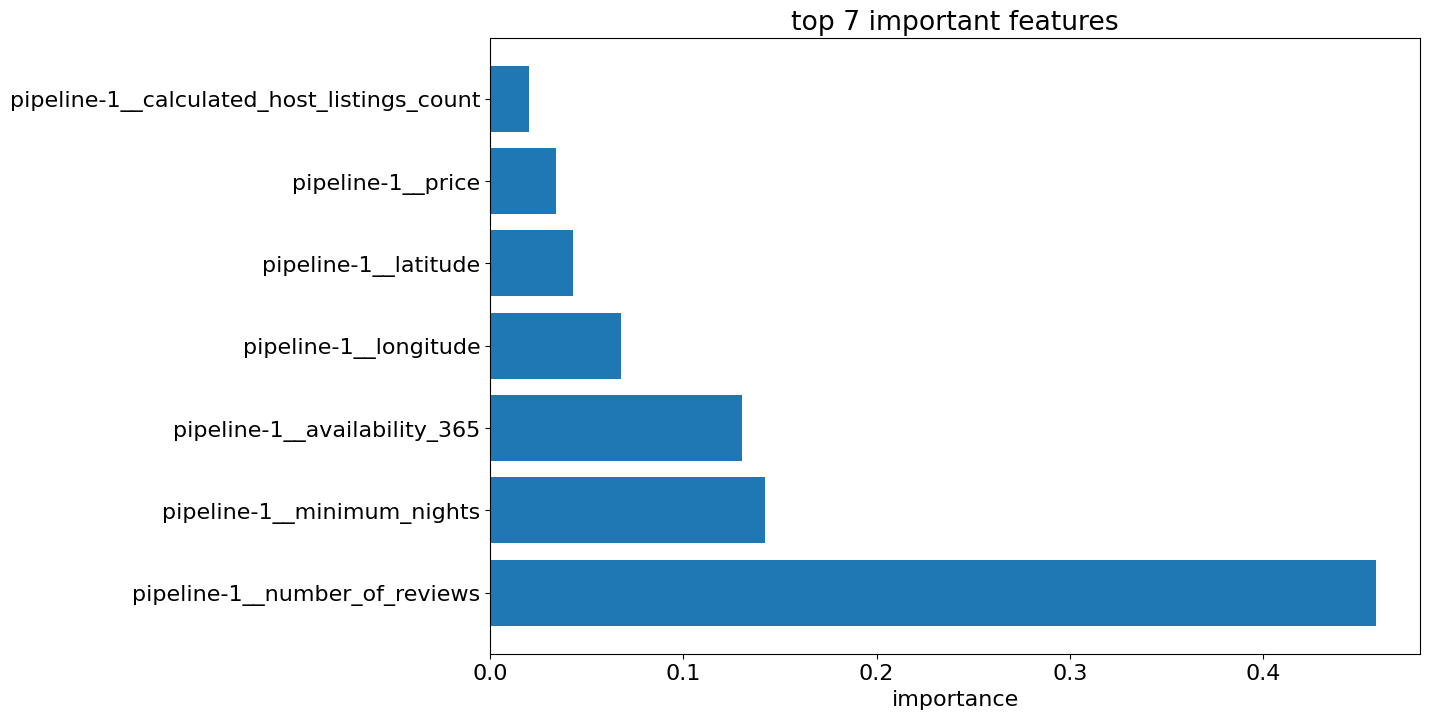

In [ ]:

plt.figure(figsize=(12, 8))
top_features = [feature_names[idx] for idx in indices[:top_n]]
top_importances = importances[indices[:top_n]]

plt.barh(range(top_n), top_importances)
plt.yticks(range(top_n), top_features)
plt.xlabel('importance')
plt.title('top 7 important features')
plt.show()

The graph above displays that listing popularity is most affected by the number of reviews. The next most critical factors are the minimum number of nights and listing availability. In summary, the listing's past record and the booking rules are far more influential than geographical factors or pricing.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set
<hr>

rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Evaluate on the test set**: Apply your best-performing model to the test data and report the test scores.

2. **Compare and reflect**: Compare the **test scores** with the **validation scores** from previous experiments. Discuss the consistency between them. How much do you **trust your results**? Reflect on whether you might have encountered **optimization bias**.

3. **Explain individual predictions**: Select one or two examples from your test predictions and use an interpretation method (e.g., **SHAP force plots**) to explain these individual predictions.
</div>

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

best_model = random_search_gb.best_estimator_

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_r2 = best_model.score(X_test, y_test)

print("test score: " + str(test_r2))

test score: 0.5301246053368396


In [ ]:
# Compare test scores with validation scores

print("test score vs validation score")

# Get validation score from RandomizedSearchCV
validation_score = random_search_gb.best_score_

print("CV score (optimal): " + str(validation_score))
print("Test set score: " + str(test_r2))

test score vs validation score
CV score (optimal): 0.5458081383808303
Test set score: 0.5301246053368396


Test and validation scores are consistent as they differ by a small percentage , confirming the models' ability to generalize on unseen data. This is achieved through 5-fold cross-validation during optimization and following the golden rule, ensuring an unbiased outcome. Individual prediction analysis confirms that high-performing listings are affected by number of past reviews, minimum nights, and high availability.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results
<hr>
rubric={points:12}

Imagine you are preparing to present the summary of your results to your boss and co-workers.

<div class="alert alert-info">
    
**Your tasks:**

1. **Summarize key results**: Create a clear and concise table highlighting your most important results (e.g., models compared, validation/test scores, key observations).

2. **Write concluding remarks**: Summarize your main takeaways from the project, including what worked well and what did not.

3. **Propose future improvements**: Discuss ideas or approaches you did not try but that could potentially improve **performance** or **interpretability**.

4. **Report final results**: Report your **final test score** and the **metric** you used.

</div>


<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

Concluding Remarks

Successes: Key performance gains were achieved through feature engineering and the use of ensemble methods. Tree based models, specifically gradient boosting, successfully captured the relationships in the data and substantially outperformed the baseline model. Hyperparameter optimization using RandomizedSearchCV was done but did not bring significant improvements. The final optimized gradient boosting model achieving an accuracy of 53.01% on the test set with, displaying its capability to generalize on a set of unseen data.

Areas for improvement: Certain strategies did not produce expected returns. Feature selection via RFECV was ineffective, likely because of the built-in feature handling capabilities of ensemble models. Furthermore, KNN model showed poor efficiency as it took the most time, and only mediocre performance of 41.53%. The linear regression model performing poorly (%35.10), confirming the non-linear relationship between variables. Optimization gains from hyperparameter tuning were insignificantly small, indicating that initial model parameters were already close to optimal.

Overall, the project successfully developed a model that accounts for approximately 53% of listing popularities in the dataset, which I would consider to be a solid and reliable outcome.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

</div>

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

Going through the entire stages of building a predictive model from the ground up, and realizing that even the most optimized model does not always produce satisfactory results.

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make sure to push the most up to date version of your homework assignment to your GitHub repository so that we can use it for grading if there are any problems with your submission on Gradescope. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.


This was a tricky one but you did it 👏👏!  

![](img/eva-well-done.png)